<a href="https://colab.research.google.com/github/Manishaneeli/FMML_Project_and_Labs/blob/main/AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [8]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [9]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [10]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

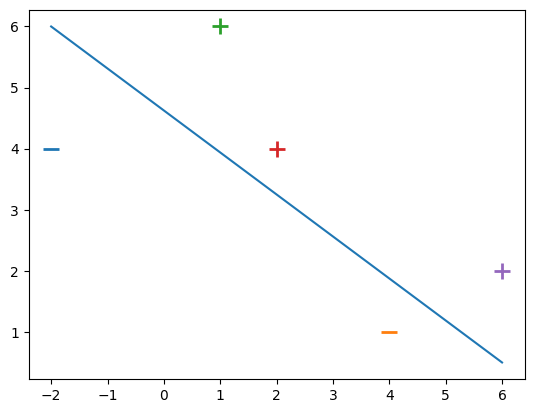

In [11]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

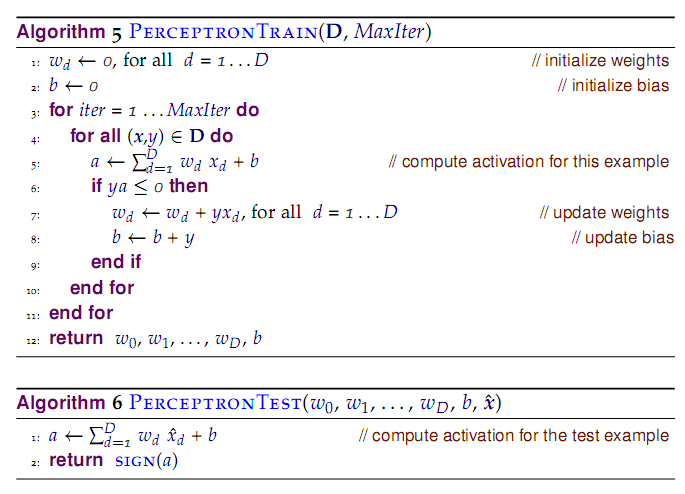

The algorithm is shown in the above image.

In [12]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [13]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

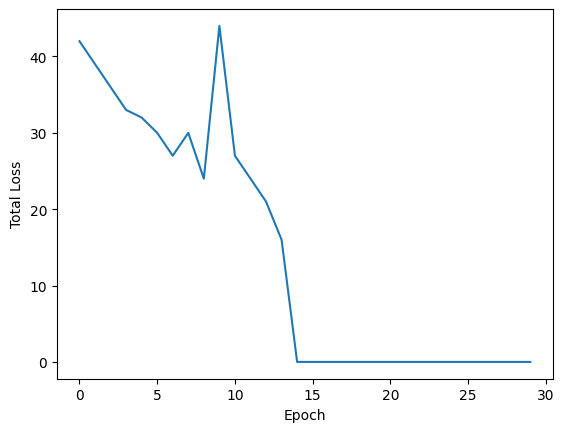

In [14]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

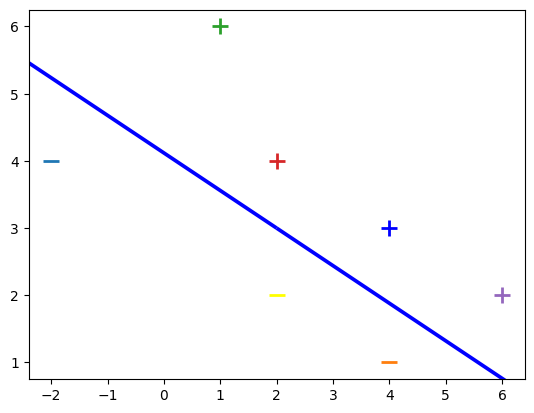

In [15]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?




##Answers

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
data = pd.read_csv(url, header=None)
data = data.values
X = data[:, :-1]
y = data[:, -1]
y = np.where(y == 0, -1, 1)
X = np.hstack((X, -np.ones((X.shape[0], 1))))


Learning Rate: 0.01


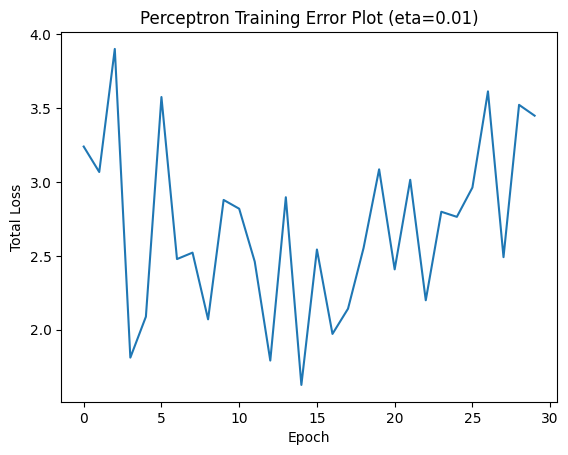

Converged in 30 epochs

Learning Rate: 0.1


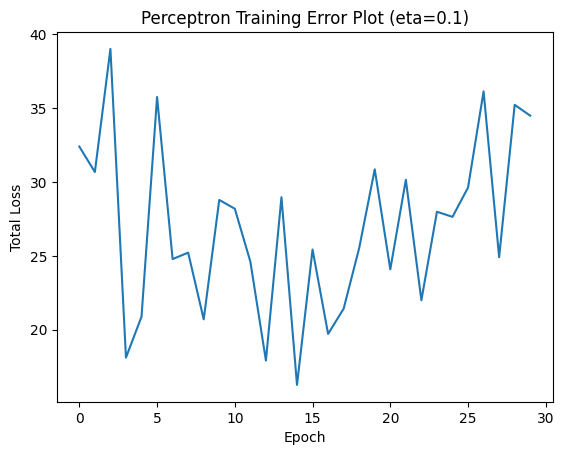

Converged in 30 epochs

Learning Rate: 1


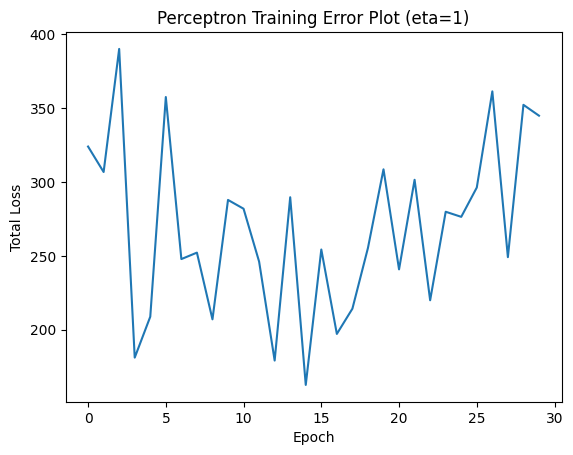

Converged in 30 epochs

Learning Rate: 10


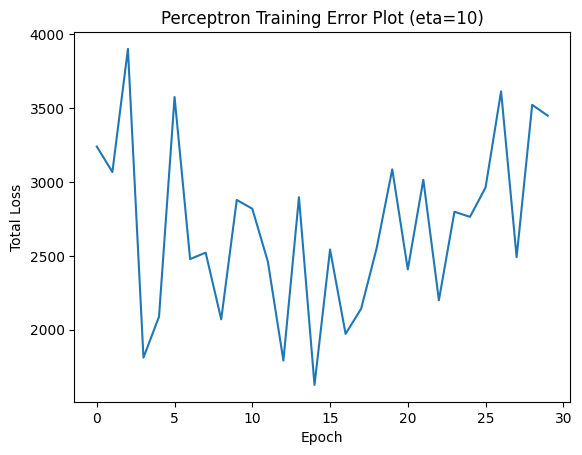

Converged in 30 epochs



In [17]:

def perceptron_algo_plot(X, Y, eta=1, max_epochs=30):
    w = np.zeros(len(X[0]))
    errors = []

    for t in range(max_epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        if total_error == 0:
            break

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Perceptron Training Error Plot (eta={eta})')
    plt.show()

    return w, t + 1
learning_rates = [0.01, 0.1, 1, 10]

for eta in learning_rates:
    print(f"Learning Rate: {eta}")
    w, epochs = perceptron_algo_plot(X, y, eta)
    print(f"Converged in {epochs} epochs\n")



###3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

In [18]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [19]:
y = np.array([-1, -1, 1, -1, -1])

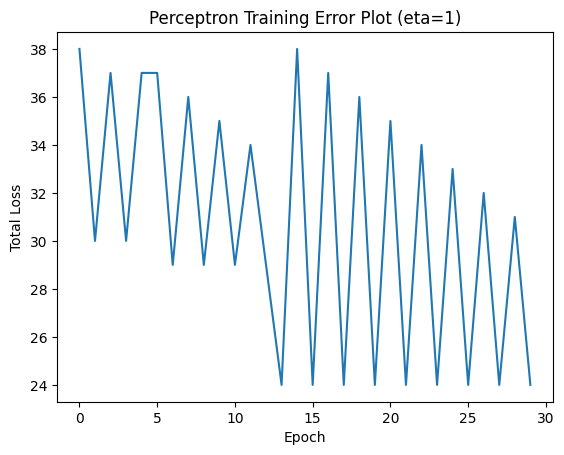

(array([-2.,  3., 15.]), 30)


In [20]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

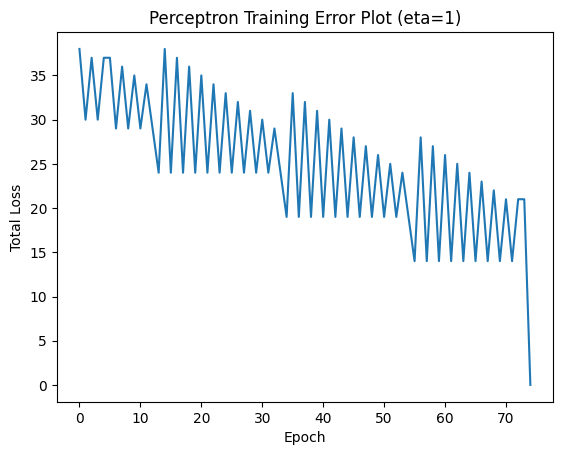

Weight vector: [ 0.  7. 36.]
Number of epochs run: 75


In [21]:

def perceptron_algo_plot(X, Y, eta=1, max_epochs=100):
    w = np.zeros(len(X[0]))
    errors = []

    for t in range(max_epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        if total_error == 0:
            break
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Perceptron Training Error Plot (eta={eta})')
    plt.show()

    return w, t + 1
w, epochs = perceptron_algo_plot(X, y, eta=1, max_epochs=100)
print(f"Weight vector: {w}")
print(f"Number of epochs run: {epochs}")


## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.


##i) answer if this dataset is learnable by Perceptron

Yes, the dataset corresponding to the boolean function "AND" over the 2-bit binary input is learnable by a Perceptron.

Reason:
The Perceptron algorithm can learn any linearly separable dataset. The "AND" function is linearly separable because we can draw a straight line (or hyperplane in higher dimensions) that perfectly separates the input space into two classes: those that output +1 and those that output -1.



##ii. if so, write down the weights update procedure for each iteration; if not, explain why.

Here is the weights update procedure for each iteration of the Perceptron algorithm applied to the dataset for the "AND" function:

Initialization:

Start with weights
𝑤
1
=
0
w
1
​
 =0,
𝑤
2
=
0
w
2
​
 =0, and bias
𝑏
=
0
b=0.
Epoch 1:

Sample (0, 0), y = -1:

The predicted output
𝑦
pred
y
pred
​
  is 0.
Update:
𝑤
1
=
0
w
1
​
 =0,
𝑤
2
=
0
w
2
​
 =0,
𝑏
=
−
1
b=−1.
Sample (0, 1), y = -1:

The predicted output
𝑦
pred
y
pred
​
  is -1.
No update needed since
𝑦
pred
=
𝑦
y
pred
​
 =y.
Sample (1, 0), y = -1:

The predicted output
𝑦
pred
y
pred
​
  is -1.
No update needed since
𝑦
pred
=
𝑦
y
pred
​
 =y.
Sample (1, 1), y = +1:

The predicted output
𝑦
pred
y
pred
​
  is -1.
Update:
𝑤
1
=
2
w
1
​
 =2,
𝑤
2
=
2
w
2
​
 =2,
𝑏
=
1
b=1.
Epoch 2:

Sample (0, 0), y = -1:

The predicted output
𝑦
pred
y
pred
​
  is +1.
Update:
𝑤
1
=
2
w
1
​
 =2,
𝑤
2
=
2
w
2
​
 =2,
𝑏
=
0
b=0.
Sample (0, 1), y = -1:

The predicted output
𝑦
pred
y
pred
​
  is +2.
Update:
𝑤
1
=
2
w
1
​
 =2,
𝑤
2
=
1
w
2
​
 =1,
𝑏
=
−
1
b=−1.
Sample (1, 0), y = -1:

The predicted output
𝑦
pred
y
pred
​
  is +1.
Update:
𝑤
1
=
1
w
1
​
 =1,
𝑤
2
=
1
w
2
​
 =1,
𝑏
=
−
2
b=−2.
Sample (1, 1), y = +1:

The predicted output
𝑦
pred
y
pred
​
  is 0.
Update:
𝑤
1
=
2
w
1
​
 =2,
𝑤
2
=
2
w
2
​
 =2,
𝑏
=
−
1
b=−1.

Subsequent Epochs:

Continue repeating this process, updating weights and bias for misclassified samples until all samples are correctly classified or a fixed number of epochs is reached.
The algorithm continues to adjust the weights and bias in this manner until the Perceptron correctly classifies all the input samples.








###2.Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?
###Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

Learnable Functions by a Perceptron
A Perceptron can learn linearly separable functions. For 2-bit binary inputs, the linearly separable functions are:

AND

OR

NAND

NOR

Identity (x1)

Identity (x2)

Constant True

Constant False


Non-Learnable Functions
The functions that are not linearly separable by a Perceptron include:

XOR (Exclusive OR):

x1	x2	y (XOR)

0	0	0

0	1	1

1	0	1

1	1	0

XNOR (Exclusive NOR):

x1	x2	y (XNOR)

0	0	1

0	1	0

1	0	0

1	1	1


XOR and XNOR are not linearly separable because there is no single straight line that can separate the positive and negative examples in the input space.


Thus, the Perceptron can learn 8 of the 16 possible boolean functions over a 2-bit binary input. The remaining 8 functions are not linearly separable and cannot be learned by a single-layer Perceptron.